In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import set_matplotlib_formats

import sys
sys.path.append('functions/')

%matplotlib inline
set_matplotlib_formats('svg')
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# File browser

In [2]:
from filebrowser import FileBrowser
File = FileBrowser()
display(File.widget())

path = File.path

# Functions

In [3]:
def demo(n_windows, X, Bounds, dt, Plot, Extrema, Material, Doping):
    """ dfa"""
    import matplotlib.pyplot as plt 
    from matplotlib import cm
    import numpy as np
    from material import material
    from load_data import load_data
    from time_windows import time_windows
    from dlts_plot import dlts_plot
    from find_min import find_min
    from find_max import find_max
    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12,5)
    axs[0].set_title("Transient")
    axs[1].set_title("DLTS")
    
    
    
    A_e, A_h = material(Material)
    T, Time, C = load_data(File.path, dt)
    T1, T2, = time_windows(n_windows, X, Time, C, axs[0])
    DLTS = dlts_plot(T, Time, C, T1, T2, n_windows, axs[1])
    
    
    if Plot:
        if Extrema == 'Max':
            find_max(Bounds[0], Bounds[1], DLTS, T, Time, T1, T2, X, n_windows, Doping, A_h)

        elif Extrema == 'Min':
            find_min(Bounds[0], Bounds[1], DLTS, T, Time, T1, T2, X, n_windows, Doping, A_e)


In [4]:
def interface():
    '''Initiates widgets'''
    
    from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox, Label
    import ipywidgets as widgets
 
    Material = widgets.Select(
        options = ['Ga2O3', 'GaN'],
        value   = 'Ga2O3',
        description = 'Material:',
        disabled = False)
    
    Doping = widgets.BoundedFloatText(
        value=2.5E15,
        min=1E5,
        max=1E22,
        step=0.1,
        description=r'Doping $cm^{-3}$:',
        disabled=False)
    
    dt = widgets.BoundedIntText(
        value=150,
        min=15,
        max=350,
        step=1,
        description='Time step',
        disabled=False)

    
    n_windows = widgets.BoundedIntText(
        value=2,
        min= 2, 
        max= 100, 
        step=1, 
        description='№ of windows')

    X = widgets.IntSlider(
        value= 2,
        min=2, #
        max=30, # 
        step=1, # 
        description=r'$t_2/t_1 = $')

    Bounds = widgets.FloatRangeSlider(
        value=[200, 500],
        min=200,
        max=500,
        step=1,
        description=r'T for peaks:',)

    Plot = widgets.ToggleButton(
        value = False,
        button_style='info',
        description = 'Plot arrhenius?',
        disabled = False,
        icon='plus')
    
    Extrema = widgets.Select(
        options = ['Max', 'Min'],
        value   = 'Max',
        description = 'Extrema:',
        disabled = False)

    left_box = VBox([Material, Doping])
    center_box = VBox([dt, n_windows, X])
    right_box = VBox([Extrema, Bounds, Plot])
    ui = widgets.HBox([left_box, center_box, right_box])
    out = widgets.interactive_output(demo, {'n_windows':n_windows, 'X':X, 'Bounds':Bounds, 'dt':dt, 'Doping':Doping,
                                            'Plot':Plot, 'Extrema':Extrema, 'Material':Material })
    display(ui, out)


In [8]:
interface()

Output()

In [6]:
Eg = 4.85 #eV
Ts = ['E1',  'E2*',   'E2',   'E3',   'E4'] #
Ns = [2E13, 1.2E14, 2.2E14, 1.0E14,   9E13] # cm-3
Es = [0.65,   0.74,    0.8,   1.05,    1.2] # Ec-Et, eV

14.0


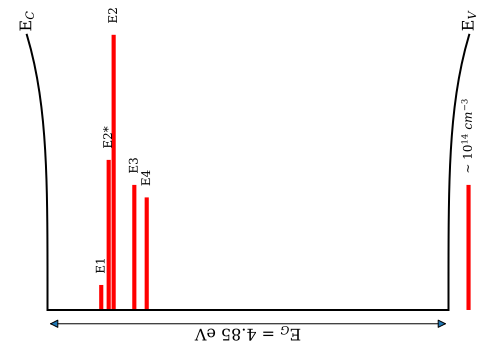

In [7]:
from band_plot import band_plot
band_plot(Eg, Ts, Ns, Es, size = 12, thick = 0.05, border = 0.085)